In [1]:
from cloudpathlib import AnyPath
from eosets.series import Series
from eoreader.bands import NBR
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"), log_lvl=logging.INFO)
logs.init_logger(logging.getLogger("eosets"))

In [3]:
# Get the base paths
data_path = AnyPath(r"/home/ds2_db3/CI/eosets/PAIR")

In [4]:
# Get a list of list (for potential mosaics) of Sentinel-2 images
s2_paths = [
    [data_path / "S2A_MSIL1C_20200824T110631_N0209_R137_T29TQE_20200824T150432.zip"],
    [data_path / "S2B_MSIL1C_20200908T110619_N0209_R137_T29TQE_20200908T132324.zip"]
]
aoi_path = data_path / "Fire_Spain.geojson"

2023-06-08 13:49:28,219 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***


2023-06-08 13:49:30,446 - [DEBUG] - Merging bands NBR


2023-06-08 13:49:30,517 - [DEBUG] - Collocating bands


2023-06-08 13:49:30,538 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-06-08 13:49:32,703 - [DEBUG] - Merging bands NBR


2023-06-08 13:49:32,764 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


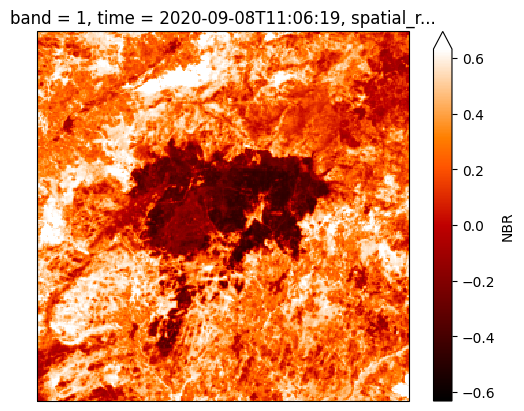

In [5]:
series = Series(paths=s2_paths)

# Load NBR
nbr_ds = series.load(
    bands=NBR,
    window=aoi_path,
    pixel_size=60
)

# Plot the pairs
crs = ccrs.UTM(str(nbr_ds.rio.crs.to_epsg())[-2:])
nbr_ds["NBR"].isel(time=1).plot(
    robust=True,
    transform=crs,
    x="x",
    y="y",
    cmap="gist_heat",
    subplot_kws={'projection':crs}
)
plt.show()

In [6]:
nbr_ds

<xarray.Dataset>
Dimensions:      (x: 272, y: 271, band: 1, time: 2)
Coordinates:
  * x            (x) float64 7.705e+05 7.706e+05 ... 7.867e+05 7.868e+05
  * y            (y) float64 4.458e+06 4.458e+06 ... 4.442e+06 4.442e+06
  * band         (band) int64 1
  * time         (time) datetime64[ns] 2020-08-24T11:06:31 2020-09-08T11:06:19
    spatial_ref  int64 0
Data variables:
    NBR          (band, y, x, time) float32 0.2922 0.2713 ... 0.4527 0.4244
Attributes:
    long_name:         NBR
    condensed_name:    20200824_S2
    acquisition_date:  2020-08-24 00:00:00

In [7]:
stack = series.stack(NBR,
    window=aoi_path,
    pixel_size=60
    )
stack

2023-06-08 13:49:33,027 - [DEBUG] - *** Loading [] for 20200824T110631_S2_T29TQE_L1C_150432 ***


2023-06-08 13:49:33,045 - [DEBUG] - Collocating bands


2023-06-08 13:49:33,065 - [DEBUG] - *** Loading [] for 20200908T110619_S2_T29TQE_L1C_132324 ***


2023-06-08 13:49:33,082 - [DEBUG] - Collocating bands


<xarray.DataArray '2020-08-24T11:06:31_NBR_2020-09-08T11:06:19_NBR' (bands: 2,
                                                                     y: 271,
                                                                     x: 272)>
array([[[ 0.29215732,  0.4141129 ,  0.41982567, ...,  0.0864888 ,
          0.03820598,  0.00598556],
        [ 0.27878785,  0.422693  ,  0.38966158, ...,  0.08063875,
          0.03872617, -0.00363637],
        [ 0.36653206,  0.43033397,  0.49138296, ...,  0.08462457,
          0.04146922,  0.09817036],
        ...,
        [ 0.04074569,  0.01427867,  0.01138141, ...,  0.28146973,
          0.35828874,  0.55584246],
        [ 0.01633488, -0.02060662, -0.04766013, ...,  0.53853804,
          0.51312035,  0.3917417 ],
        [-0.08005945, -0.09234507, -0.02785147, ...,  0.56374234,
          0.5784413 ,  0.45268297]],

       [[ 0.27130094,  0.3637257 ,  0.4012888 , ...,  0.06390254,
          0.00854352, -0.034127  ],
        [ 0.25713083,  0.4044636 ,  0.35099605, ...,  0.0451389 ,
         -0.01419647, -0.05843398],
        [ 0.33729634,  0.41639075,  0.43952683, ...,  0.04612509,
         -0.00711878,  0.0126822 ],
        ...,
        [ 0.02825456, -0.00621118, -0.00383959, ...,  0.25569504,
          0.36967078,  0.64235127],
        [ 0.00617283, -0.02171428, -0.05901639, ...,  0.5075718 ,
          0.47519293,  0.41946402],
        [-0.09205024, -0.11479785, -0.05879967, ...,  0.5896118 ,
          0.58982766,  0.42435047]]], dtype=float32)
Coordinates:
  * x            (x) float64 7.705e+05 7.706e+05 ... 7.867e+05 7.868e+05
  * y            (y) float64 4.458e+06 4.458e+06 ... 4.442e+06 4.442e+06
    spatial_ref  int64 0
  * bands        (bands) object MultiIndex
  * variable     (bands) object '2020-08-24T11:06:31_NBR' '2020-09-08T11:06:1...
  * band         (bands) int64 1 1
Attributes:
    long_name:       2020-08-24T11:06:31_NBR 2020-09-08T11:06:19_NBR
    condensed_name:  20200824T110631_S2_T29TQE_L1C_150432_20200908T110619_S2_...

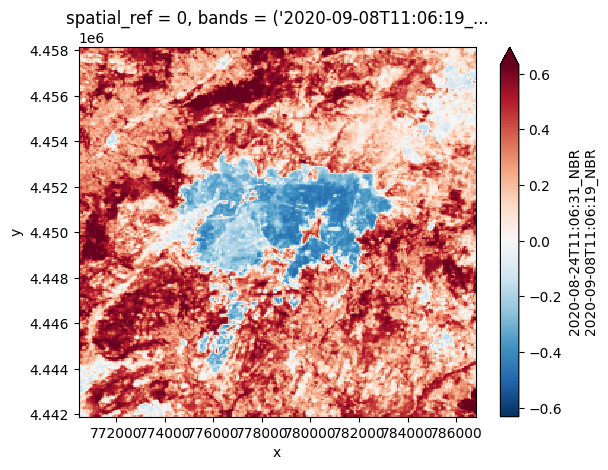

In [8]:
stack.isel(bands=1).plot(robust=True)